# <font color='navy'> <b> Stemfie-X Example - Small Toy Car </b></font>

<img src="./img/banner_02.png" width="800">

Implementation of the project
[STEMFIE project - Small Toy Car](https://www.stemfie.org/?view=article&id=221:new-stemfie-project-small-toy-car&catid=13) in the Stemfie-X library using CadQuery. The source code for the example is [here](./examples/05_simple_car.py).

 <table>
  <tr>
    <th>  <img src="./img/simple_car_3.png" width="300"></th>
    <th>  <img src="./img/simple_car_4.png" width="300"> </th>
    <th>  <img src="./img/small_car.jpg" width="250"> </th>
  </tr>
</table> 

### <font color='purple'> <b> Components </b></font>

Implementation of model components in the Python programming language using the Stemfie-X library. All STEP files needed to 3D print and build the model are in the directory **./notebook/model/step_04_simple_car/**. 

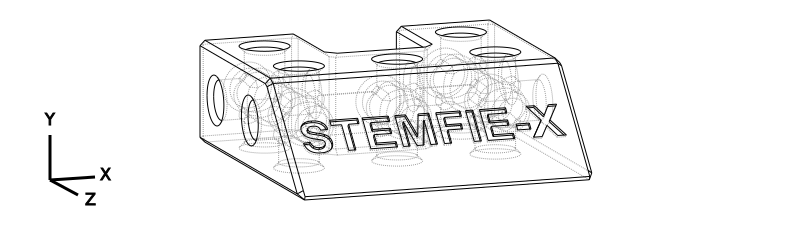

In [7]:
from IPython.display import Image
from lib import *

class Beam_Front(Stemfie_X): 
    def __init__(self):
        bf1 = Beam_Block(3).BU_Tx(-1)
        bf2 = Beam_Block(2).Rz()
        bf3 = bf2.copy().BU_Tx(2)
        bf1.U([bf2,bf3])
        
        bf4 = BU_Polyline( [[0,0],[0,1], [1,1]], height=3).Ry(-90).BU_Txy([2,-1])
        bf1.U(bf4)
        
        # chamfer
        bf1.obj= bf1.obj.faces().chamfer(.5)
        bf1.obj = bf1.obj.faces(">(0, -1, 1)").workplane(origin=(5, 0, 0))
        bf1.obj = bf1.obj.text("STEMFIE-X", 5, -0.3, kind='bold') 
        
        self.obj = bf1.obj

b1 = Beam_Front()
b1.export_step('./model/step_04_simple_car/user_SC_01')

display(SVG(b1.Rx(-90).obj.toSvg()))

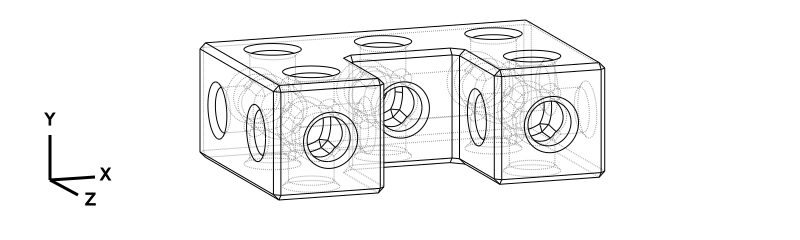

In [8]:
class Beam_uShape(Stemfie_X):
    def __init__(self):
        bs1 = Beam_Block(3).BU_Tx(-1)
        bs2 = Beam_Block(2).Rz()
        bs3 = bs2.copy().BU_Tx(2)
        bs1.U([bs2,bs3])

        bs1.obj = bs1.obj.faces().chamfer(.5)
        self.obj = bs1.obj

b2 = Beam_uShape()
b2.export_step('./model/step_04_simple_car/user_SC_02')
display(SVG(b2.Rx(90).obj.toSvg()))

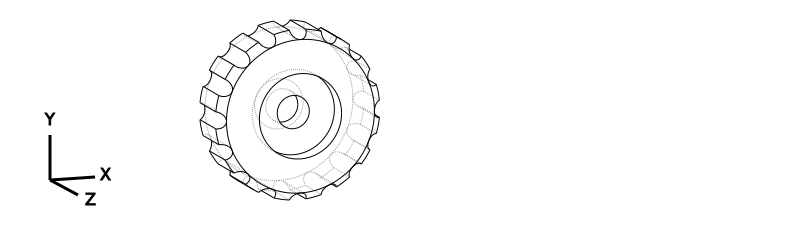

In [9]:
class Wheel(Stemfie_X):
    def __init__(self):
        w1 = BU_Cylinder(2, 1/2+1/4, hole=True)
        w1.obj= w1.obj.faces().chamfer(1)
        
        w2 = BU_Cylinder(1, 1/4, hole=True).BU_Tz(1/2-1/4)
        w1.D(w2)
        
        N = 16                         # dezen
        r = 10
        gamma = np.pi*2/N
        ds = cq.Workplane('XY')
        for n in range(N):
            hx = np.cos(gamma*n)*r
            hy = np.sin(gamma*n)*r
            ds = ds.moveTo(hx,hy)
            ds = ds.cylinder(20, 1)
        
        w1.obj = w1.obj.cut(ds)
        self.obj = w1.obj

w = Wheel()
w.export_step('./model/step_04_simple_car/user_SC_03')
display(SVG(w.obj.toSvg()))

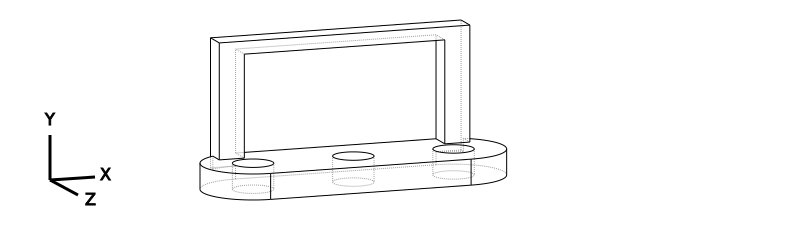

In [10]:
class Brace_Window(Stemfie_X):
    def __init__(self):
        q1 = BU_Cube([2+1/2, 1/4, 1+1/4], center=False)
        q2 = BU_Cube([2+1/2-1/2, 1/4, 1+1/4-1/4], center=False).BU_T([1/4, 0, 1/8])
        q1.D(q2).BU_T([-1/4, 1/4, 1/8])
        q3 = Brace(3, 1/4)
        q1.U(q3)
        self.obj = q1.obj

q = Brace_Window()
q.export_step('./model/step_04_simple_car/user_SC_04')
display(SVG(q.Rx(-90).obj.toSvg()))

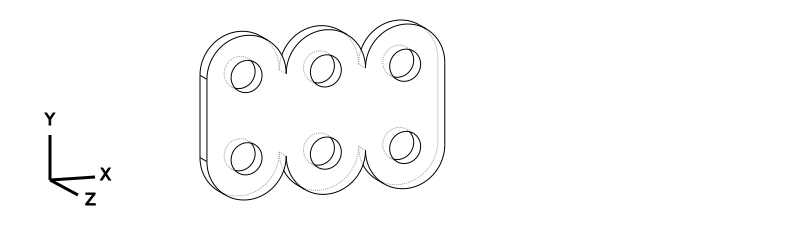

In [11]:
class Brace_Motor(Stemfie_X):
    def __init__(self):
        a1 = Brace(2, 1/4)
        a2 = Brace(2, 1/4).BU_Ty( 1)
        a3 = Brace(2, 1/4).BU_Ty(-1)
        a1.U([a2,a3])
        self.obj = a1.obj
m = Brace_Motor()
m.export_step('./model/step_04_simple_car/user_SC_05')
display(SVG(m.Rz().obj.toSvg()))

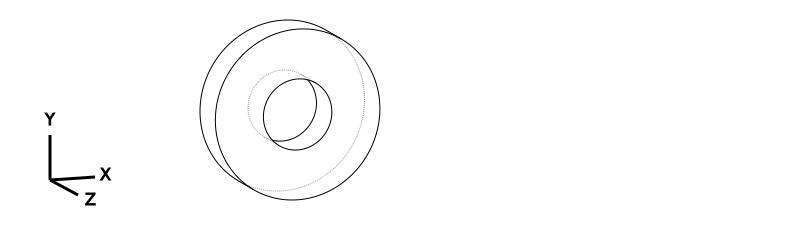

In [13]:
class Disk(Stemfie_X):
    def __init__(self):
        d1 = BU_Cylinder(1-1/16, 1/4, hole=True).BU_Tz(1/2-1/4)
        self.obj = d1.obj

d = Disk()
d.export_step('./model/step_04_simple_car/user_SC_06')
display(SVG(d.Rz().obj.toSvg()))

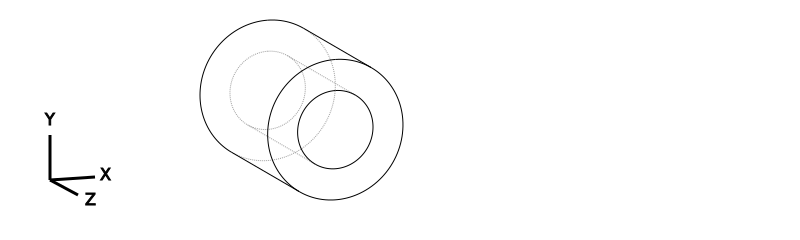

In [14]:
# exhaust
ex = BU_Cylinder(0.7, 1, hole=True).BU_Tz(1/2)
ex.export_step('./model/step_04_simple_car/user_SC_06')
display(SVG(ex.Rz().obj.toSvg()))
        

### <font color='purple'> <b> Building </b></font>

    Material   - PLA
    STL Files  - ./examples/05_simple_car_stl
    Axes       - plastic welding rod 4mm - ABS for plastic welding
    Screews    - standard DIN913 M4 Inner Hexagon Socket Set Screw, 8mm length (imbus)

<img src="./img/banner_02.png" width="800">